In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
import itertools
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
import dtw
import yf_df as yfdf
import csv

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [6]:
df_spx_70 = pd.read_csv("spx_70.csv")
df_spx_now = pd.read_csv("spx_now.csv")
df_spx_dot = pd.read_csv("spx_dot.csv")
df_spx_lm = pd.read_csv("spx_lm.csv")

df_vix_lm = pd.read_csv("vix_lm.csv")
df_vix_dot = pd.read_csv("vix_dot.csv")
df_vix_now = pd.read_csv("vix_now.csv")

In [7]:
scaler = MinMaxScaler()

df_spx_now_close = pd.DataFrame(df_spx_now["Close"])
df_spx_dot_close = pd.DataFrame(df_spx_dot["Close"])
df_spx_lm_close = pd.DataFrame(df_spx_lm["Close"])
df_spx_70_close = pd.DataFrame(df_spx_70["Close"])

nm_nparr_spx_70 = scaler.fit_transform(df_spx_70_close)
nm_list_spx_70 = nm_nparr_spx_70.tolist()
nm_df_spx_70 = pd.DataFrame({"nm_Close": nm_list_spx_70})

nm_nparr_spx_now = scaler.fit_transform(df_spx_now_close)
nm_list_spx_now = nm_nparr_spx_now.tolist()
nm_df_spx_now = pd.DataFrame({"nm_Close" : nm_list_spx_now})

nm_nparr_spx_dot = scaler.fit_transform(df_spx_dot_close)
nm_list_spx_dot = nm_nparr_spx_dot.tolist()
nm_df_spx_dot = pd.DataFrame({"nm_Close" : nm_list_spx_dot})

nm_nparr_spx_lm = scaler.fit_transform(df_spx_lm_close)
nm_list_spx_lm = nm_nparr_spx_lm.tolist()
nm_df_spx_lm = pd.DataFrame({"nm_Close" : nm_list_spx_lm})

df_spx_70 = pd.DataFrame({"ds" : df_spx_70.index, "y" : nm_df_spx_70["nm_Close"]})
df_spx_now = pd.DataFrame({"ds" : df_spx_now.index, "y" : nm_df_spx_now["nm_Close"]})

#df_spx_23.reset_index(inplace=True)
#print(df_spx_70.round(5), df_spx_20.round(5))
#del df_spx_23['Date']

#dtw.dtw(nm_nparr_spx, nm_nparr_spx_20, keep_internals=True).plot(type="twoway")
spx_70_vs_now = dtw.dtw(nm_nparr_spx_70, nm_nparr_spx_now, keep_internals=True).distance
spx_dot_vs_now = dtw.dtw(nm_nparr_spx_dot, nm_nparr_spx_now, keep_internals=True).distance
spx_lm_vs_now = dtw.dtw(nm_nparr_spx_lm, nm_nparr_spx_now, keep_internals=True).distance

print("spx 70 vs now distance =", spx_70_vs_now)
print("spx dotcom vs now distance = ",spx_dot_vs_now)
print("spx lemhan vs now distance = ",spx_lm_vs_now)

spx 70 vs now distance = 112.68931239428845
spx dotcom vs now distance =  172.69494042694689
spx lemhan vs now distance =  270.1686510446978


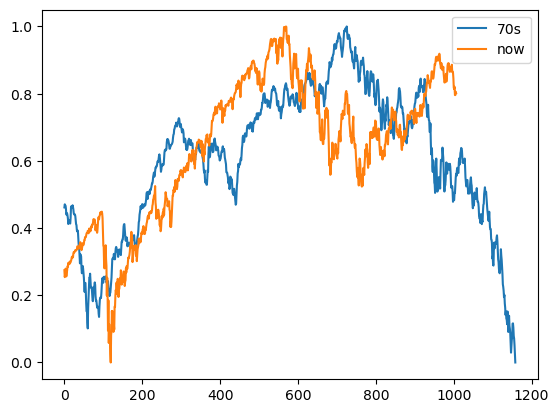

In [16]:
plt.plot(nm_list_spx_70, label='70s')
plt.plot(nm_list_spx_now, label='now')
plt.legend(ncols=1)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 2) + inhomogeneous part.

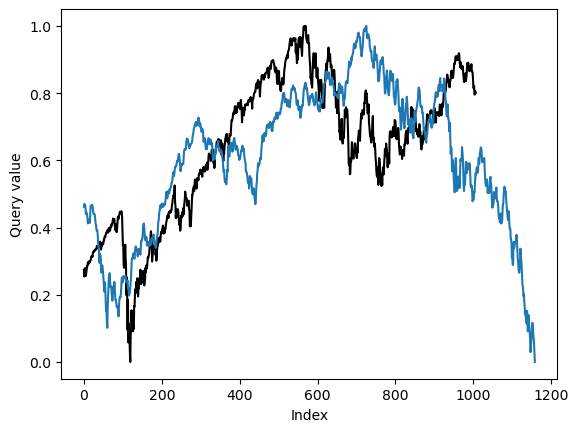

In [38]:
dtw.dtw(nm_nparr_spx_now, nm_nparr_spx_70, keep_internals=True, ).plot(type="twoway")

In [26]:
junk = []


nm_nparr_spx_now = scaler.fit_transform(df_spx_now_close)
nm_list_spx_now = nm_nparr_spx_now.tolist()
nm_df_spx_now_1 = pd.DataFrame(nm_nparr_spx_now)
df_spx_now_1 = pd.DataFrame({"ds" : df_spx_now_close.index, "y" : nm_df_spx_now_1[0]})
df_spx_now_1.head()

,ds,y
0,2022-09-01,0.385224
1,2022-09-02,0.343136
2,2022-09-06,0.327256
3,2022-09-07,0.398091
4,2022-09-08,0.424091


In [33]:
nm_df_spx_lm_1 = pd.DataFrame(nm_nparr_spx_lm)
df_spx_lm_1 = pd.DataFrame({"ds" : df_spx_lm_close.index, "y" : nm_df_spx_lm_1[0]})
df_spx_lm_1.head()

,ds,y
0,2007-10-01,0.979620
1,2007-10-02,0.979159
2,2007-10-03,0.971236
3,2007-10-04,0.974894
4,2007-10-05,0.991492


In [34]:
m = Prophet(daily_seasonality = True)
m.fit(df_spx_lm_1)

21:14:20 - cmdstanpy - INFO - Chain [1] start processing
21:14:20 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
future = m.make_future_dataframe(periods = 21)
print(future)

            ds
0   2007-10-01
1   2007-10-02
2   2007-10-03
3   2007-10-04
4   2007-10-05
..         ...
394 2009-04-17
395 2009-04-18
396 2009-04-19
397 2009-04-20
398 2009-04-21

[399 rows x 1 columns]


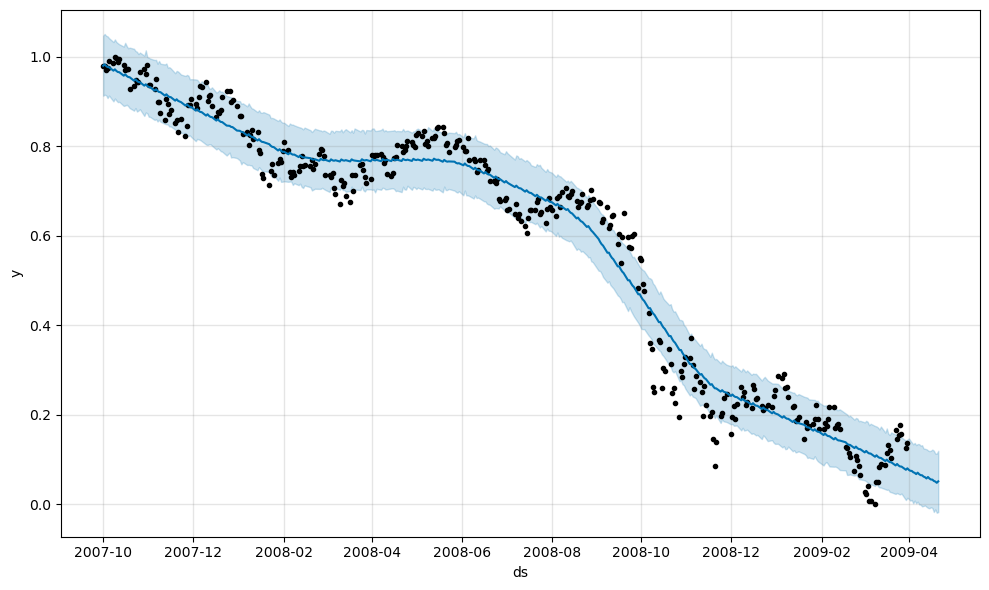

In [40]:
future = m.make_future_dataframe(periods = 21)
future.tail()

forecast = m.predict(future)
forecast['ds'].tail()

m.plot(forecast);

In [6]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]


print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


In [7]:
warnings.filterwarnings("ignore")

for param in pdq :
    for param_seasonal in seasonal_pdq :
        try :
            mod = sm.tsa.statespace.SARIMAX(df_spx_now,
                                           order = param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            result = mod.fit()
            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0049      0.060     -0.082      0.935      -0.122       0.112
ma.S.L4       -1.0000    483.965     -0.002      0.998    -949.555     947.555
sigma2         0.0018      0.886      0.002      0.998      -1.735       1.739


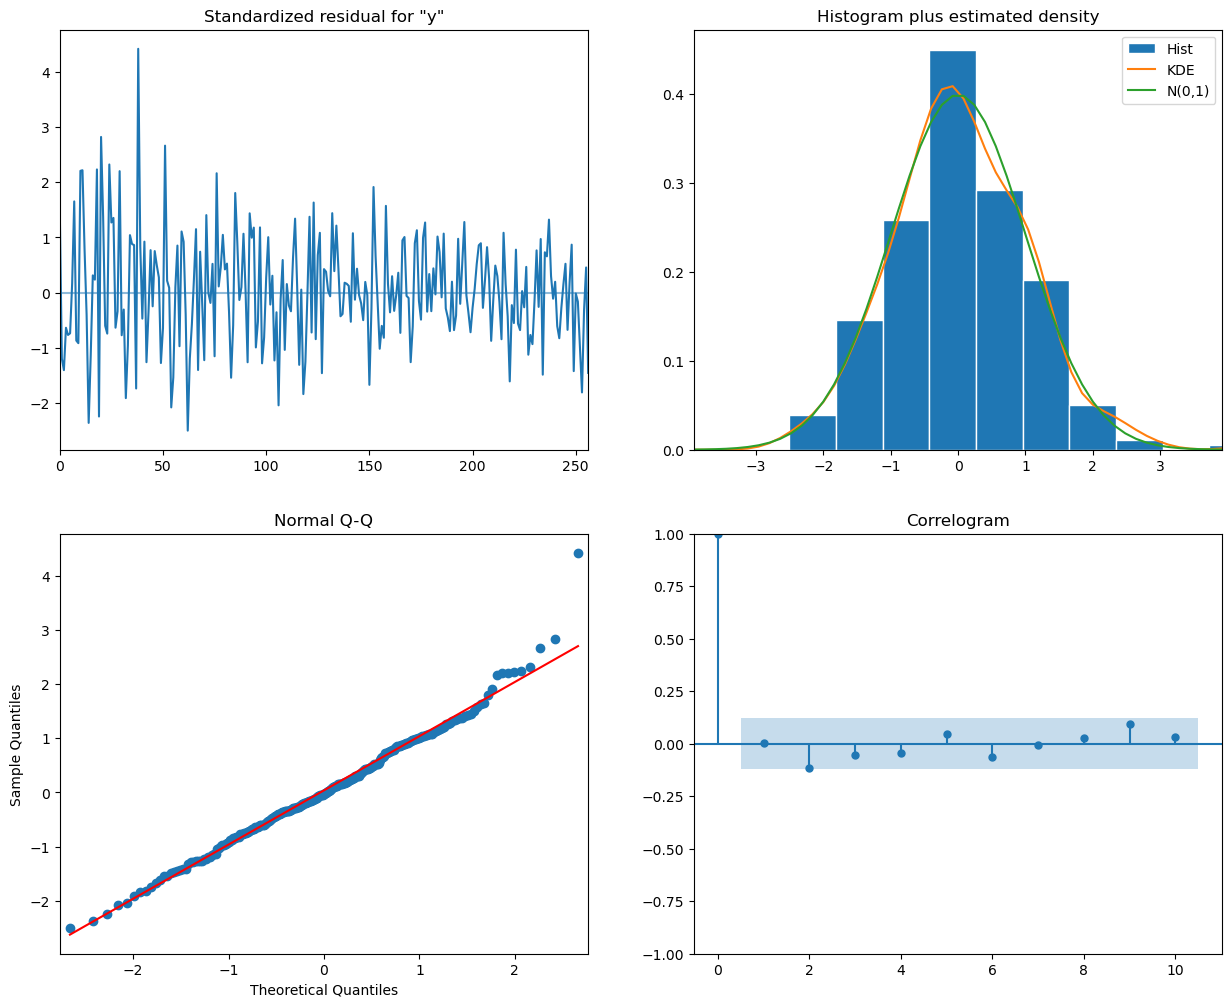

In [8]:
mod = sm.tsa.statespace.SARIMAX(nm_nparr_spx_now,
                               order=(0, 1, 1),
                               seasonal_order = (0, 1, 1, 4),
                               enforce_stationarity=False,
                               enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [37]:
m = Prophet(daily_seasonality = True)
m.fit(df_spx_now_1)

16:33:10 - cmdstanpy - INFO - Chain [1] start processing
16:33:10 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
future = m.make_future_dataframe(periods = 21)
future.tail()

,ds
284,2023-10-13
285,2023-10-14
286,2023-10-15
287,2023-10-16
288,2023-10-17


In [39]:
forecast = m.predict(future)
forecast['ds'].tail()

284   2023-10-13
285   2023-10-14
286   2023-10-15
287   2023-10-16
288   2023-10-17
Name: ds, dtype: datetime64[ns]

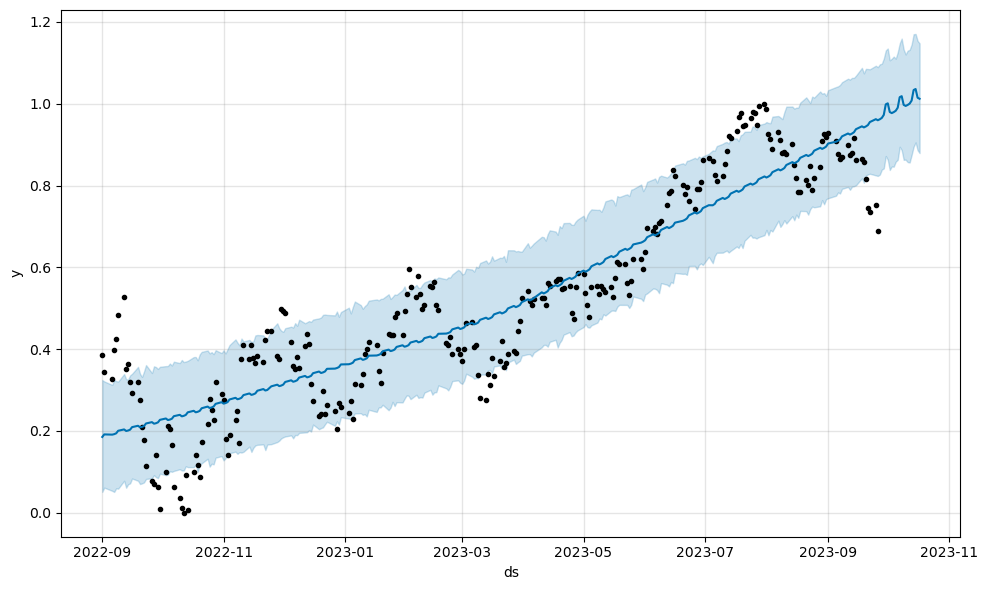

In [40]:
m.plot(forecast);